In [1]:
#Important packages
import numpy as np
import pandas as pd
import pandasql as pdsql
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import data
data=pd.read_excel(r'C:\Users\user\Desktop\GB Data Science\Data Science Applied Project\Project\data_aft_impNcleanup.xlsx')

In [3]:
#Checking data types
data.dtypes

age              int64
sex              int64
cp               int64
trestbps         int64
chol             int64
fbs              int64
rest_ecg         int64
max_h_rate       int64
ex_ang           int64
oldpeak        float64
slope            int64
heart_d_new      int64
dtype: object

In [4]:
#Checking if there is imbalance on the response variable
data['heart_d_new'].value_counts()

0    374
1    322
Name: heart_d_new, dtype: int64

In [5]:
#Add features on the dataset with numeric values (Normal=0 ; Elevated= 1; High=2)
data.loc[data['trestbps']<=120,'Blood P Category']=0
data.loc[(data['trestbps']>120)&(data['trestbps']<=129),'Blood P Category']=1
data.loc[data['trestbps']>=130,'Blood P Category']=2

In [6]:
data['Blood P Category'].unique()

array([2., 0., 1.])

In [7]:
#Cholesterol category (Normal=0 ; Elevated=1 ; High=2)
data.loc[(data['chol']<=200),'Cholesterol Category']=0
data.loc[(data['chol']>200)&(data['chol']<=239),'Cholesterol Category']=1
data.loc[(data['chol']>239),'Cholesterol Category']=2

In [8]:
data['Cholesterol Category'].unique()

array([0., 2., 1.])

In [9]:
#Set up heart rate category (Normal=0 ; High=1)
data.loc[(data['age']>20) & (data['age']<=29) & (data['max_h_rate']<=200),'Heart Rate Category']=0
data.loc[(data['age']>20) & (data['age']<=29) & (data['max_h_rate']>200),'Heart Rate Category']=1
data.loc[(data['age']>=30) & (data['age']<=34) & (data['max_h_rate']<=190),'Heart Rate Category']=0
data.loc[(data['age']>=30) & (data['age']<=34) & (data['max_h_rate']>190),'Heart Rate Category']=1
data.loc[(data['age']>=35) & (data['age']<=39) & (data['max_h_rate']<=185),'Heart Rate Category']=0
data.loc[(data['age']>=35) & (data['age']<=39) & (data['max_h_rate']>185),'Heart Rate Category']=1
data.loc[(data['age']>=40) & (data['age']<=44) & (data['max_h_rate']<=180),'Heart Rate Category']=0
data.loc[(data['age']>=40) & (data['age']<=44) & (data['max_h_rate']>180),'Heart Rate Category']=1
data.loc[(data['age']>=45) & (data['age']<=49) & (data['max_h_rate']<=175),'Heart Rate Category']=0
data.loc[(data['age']>=45) & (data['age']<=49) & (data['max_h_rate']>175),'Heart Rate Category']=1
data.loc[(data['age']>=50) & (data['age']<=59) & (data['max_h_rate']<=170),'Heart Rate Category']=0
data.loc[(data['age']>=50) & (data['age']<=59) & (data['max_h_rate']>170),'Heart Rate Category']=1
data.loc[(data['age']>=60)  & (data['max_h_rate']<=160),'Heart Rate Category']=0
data.loc[(data['age']>=60)  & (data['max_h_rate']>160),'Heart Rate Category']=1

In [10]:
data['Heart Rate Category'].unique()

array([0., 1.])

In [11]:
#Create ST depression category (Normal=0 ; High=1)

In [12]:
data.loc[(data['oldpeak']<=1),'ST Depression Category']=0
data.loc[(data['oldpeak']>1),'ST Depression Category']=1

In [13]:
#Create age category (<35=0 ; 35-44=1 ; 45-54=2 ; 55-64=3 ; >=65=4)

In [14]:
data.loc[data['age']<=34,'Age Category']=0
data.loc[(data['age']>=35) &(data['age']<45),'Age Category']=1
data.loc[(data['age']>=45) &(data['age']<55),'Age Category']=2
data.loc[(data['age']>=55) &(data['age']<65),'Age Category']=3
data.loc[data['age']>=65,'Age Category']=4

In [15]:
data['Age Category'].unique()

array([0., 1., 2., 3., 4.])

In [16]:
#Checking data types
data.dtypes

age                         int64
sex                         int64
cp                          int64
trestbps                    int64
chol                        int64
fbs                         int64
rest_ecg                    int64
max_h_rate                  int64
ex_ang                      int64
oldpeak                   float64
slope                       int64
heart_d_new                 int64
Blood P Category          float64
Cholesterol Category      float64
Heart Rate Category       float64
ST Depression Category    float64
Age Category              float64
dtype: object

In [17]:
# Based on the Var Imp Plot in R, we will create a dataset by including variables withon IncreaseMSE equals or greater than 10
data2= data[['cp','oldpeak','slope','ex_ang','sex','max_h_rate','ST Depression Category','age','trestbps','heart_d_new']]

In [18]:
#Split up independent and dependent variables

In [19]:
x=data2[['cp','oldpeak','slope','ex_ang','sex','max_h_rate','ST Depression Category','age','trestbps']]
y=data2['heart_d_new']

In [20]:
#Split the dataset into training and testing data

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# Create a Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
#Create prediction
predict_logreg = LR.predict(x_test)

In [24]:
#Calculate evaluation metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [25]:
print ('The AUC is ' + str(roc_auc_score(y_test,predict_logreg)))

The AUC is 0.7991935483870968


In [26]:
#Calculate False Postive Rate and True Positive Rate for ROC curve
false_positive_rate_logreg, true_positive_rate_logreg, thresholds = roc_curve(y_test, predict_logreg)

In [27]:
#Create a Confusion Matrix to visulize True Positive Rate and False Positive Rate

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm_logreg= confusion_matrix(y_test,predict_logreg)

In [30]:
#Show confuson matrix
cm_logreg

array([[99, 25],
       [17, 68]], dtype=int64)

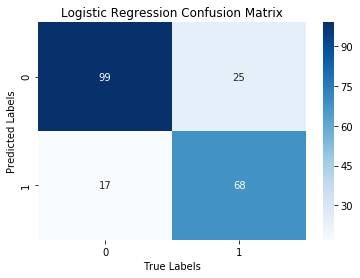

In [31]:
#Plot the confusion matrix
sns.heatmap( cm_logreg, cmap='Blues', annot=True)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.show()

# Create Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
#Create prediction
predict_dtree = dtree.predict(x_test)

In [34]:
#Calculate evaluation metrics
print ('The AUC is ' + str(roc_auc_score(y_test,predict_dtree)))

The AUC is 0.7518026565464896


In [35]:
#Calculate False Postive Rate and True Positive Rate for ROC curve
false_positive_rate_dtree, true_positive_rate_dtree, thresholds_dtree = roc_curve(y_test, predict_dtree)

In [36]:
#Create a Confusion Matrix to visulize True Positive Rate and False Positive Rate

In [37]:
cm_dtree= confusion_matrix(y_test,predict_dtree)

In [38]:
#Show confuson matrix
cm_dtree

array([[96, 28],
       [23, 62]], dtype=int64)

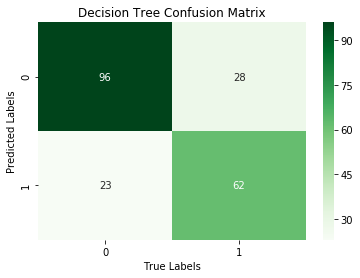

In [39]:
#Plot the confusion matrix
sns.heatmap(cm_dtree, cmap='Greens', annot=True)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.show()

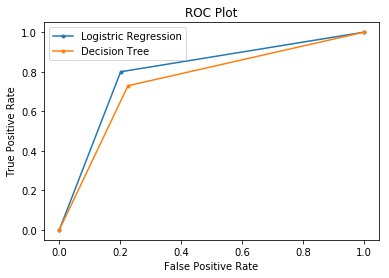

In [40]:
#Create a ROC
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg, marker='.', label='Logistric Regression')
plt.plot(false_positive_rate_dtree, true_positive_rate_dtree, marker='.', label='Decision Tree')

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()